In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats


In [13]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Junichiro Koizumi'
 'Laura Bush' 'Lleyton Hewitt' 'Serena Williams' 'Tony Blair']
(1455, 62, 47)


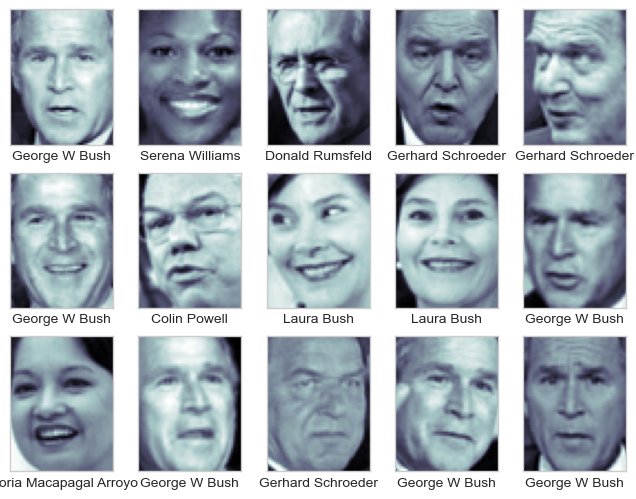

In [15]:
fig,ax = plt.subplots(3, 5 ,figsize= (8,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
        xlabel=faces.target_names[faces.target[i]])

In [17]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True,
          svd_solver='randomized', random_state=42)
svc= SVC(kernel='rbf', class_weight='balanced')
model= make_pipeline(pca, svc)

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(faces.data,faces.target,random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
            'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid= GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,Ytrain)
print(grid.best_params_)

CPU times: total: 48.5 s
Wall time: 13 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [23]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

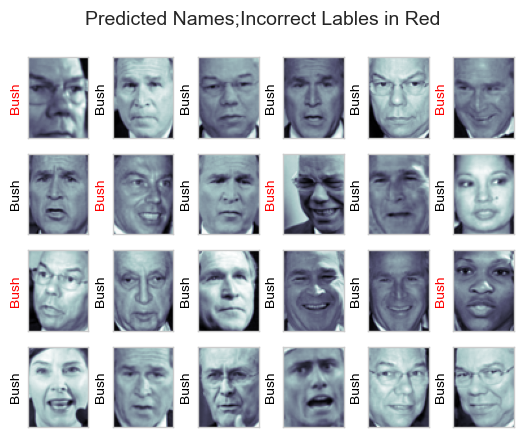

In [25]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[1]].split()[-1],
                   color='black' if yfit[i]==Ytest[i] else 'red')
fig.suptitle('Predicted Names;Incorrect Lables in Red',size=14);


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,yfit,
                            target_names=faces.target_names))

                         precision    recall  f1-score   support

           Ariel Sharon       0.78      0.78      0.78        18
           Colin Powell       0.73      0.86      0.79        59
        Donald Rumsfeld       0.71      0.78      0.75        32
          George W Bush       0.86      0.85      0.85       128
      Gerhard Schroeder       0.55      0.73      0.63        15
Gloria Macapagal Arroyo       0.93      0.87      0.90        15
      Junichiro Koizumi       0.90      0.75      0.82        12
             Laura Bush       0.90      0.75      0.82        12
         Lleyton Hewitt       0.80      0.71      0.75        17
        Serena Williams       0.73      0.53      0.62        15
             Tony Blair       0.82      0.68      0.75        41

               accuracy                           0.79       364
              macro avg       0.79      0.75      0.77       364
           weighted avg       0.80      0.79      0.79       364

